In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
sns.set(style="white")

df = pd.read_csv('../Data/Advertising.csv', index_col=0)

df.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
Radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
Newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
Sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


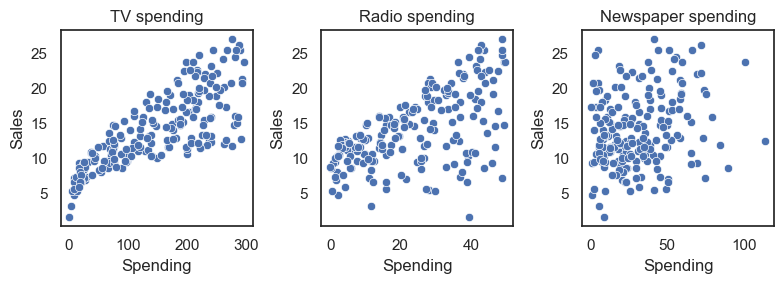

In [5]:
number_features = df.shape[1] - 1
fig, ax = plt.subplots(1, number_features, figsize=(8,3), dpi=100)

for i, feature in enumerate(df.columns[:-1]):
    sns.scatterplot(data=df, x=feature, y='Sales', ax=ax[i])
    ax[i].set(xlabel="Spending", ylabel="Sales", title=f'{feature} spending')
    
fig.tight_layout()

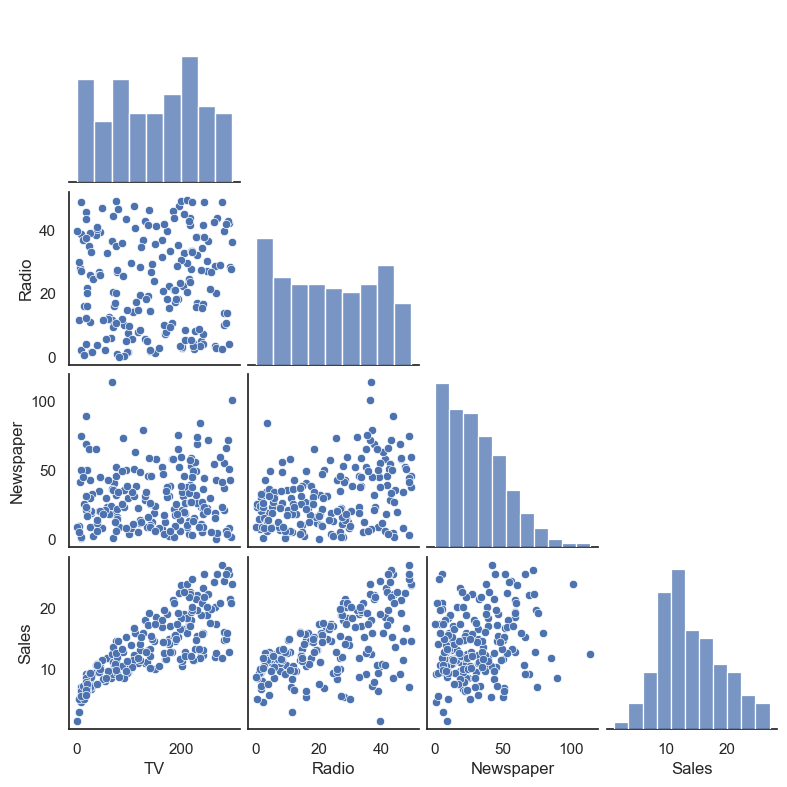

In [6]:
ax = sns.pairplot(df, corner=True, height=2)

Intercept beta_0 hat: 7.0326
Slope beta_1 hat: 0.0475


[Text(0.5, 1.0, 'TV advertisement linear regression'),
 Text(0.5, 0, 'Thousands of dollars'),
 Text(0, 0.5, 'Sales thousand units')]

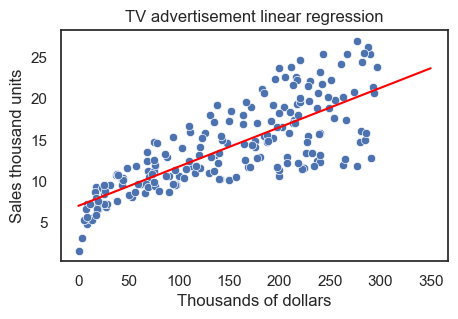

In [7]:
x, y = df['TV'], df['Sales']

beta_1, beta_0 = np.polyfit(x, y, deg=1)

y_hat = lambda x: beta_0 + beta_1 * x

print(f'Intercept beta_0 hat: {beta_0:.4f}')
print(f'Slope beta_1 hat: {beta_1:.4f}')

spend = np.linspace(0, 350)

fig, ax = plt.figure(figsize=(5,3), dpi=100), plt.axes()

sns.scatterplot(data=df, x='TV', y='Sales')
sns.lineplot(x=spend, y=y_hat(spend), color="red")

ax.set(title="TV advertisement linear regression", xlabel="Thousands of dollars", ylabel="Sales thousand units")

<Axes: xlabel='TV', ylabel='Sales'>

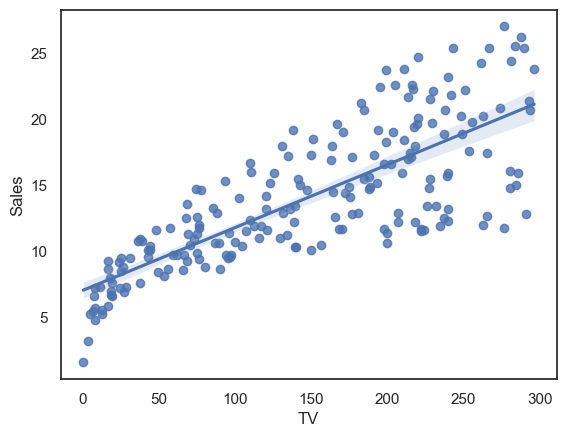

In [8]:
sns.regplot(x=x, y=y)

In [9]:
x, y = df.drop('Sales', axis="columns"), df['Sales']
x.insert(0, "Intercept", 1)

regression_fit = lambda x, y: np.linalg.pinv(x.T @ x) @ x.T @ y
beta_hat = regression_fit(x, y)

predict = lambda x, beta: np.dot(x, beta)

test_sample = [1, 230.1, 37.8, 69.2]

y_hat = predict(test_sample, beta_hat)

print(f"TV: $230.1k, Radio: $37.8k, Newspaper: $69.2k predicts {y_hat:.1f}k units")

TV: $230.1k, Radio: $37.8k, Newspaper: $69.2k predicts 20.5k units
